# Top rated videogames 1995-2021

Con la base de datos, responderé las siguientes preguntas:

-¿cuáles son los juegos mejores y peores calificados?

-¿qué plataforma cuenta con más juegos dentro del top 100?

-¿cuáles de los juegos listados pertenecen a cada plataforma?

-¿cuál plataforma ofrecía los mejores videojuegos antes del 2000? (considerando el top 10)

-¿cuál es el promedio de calificación de todos los juegos por plataforma?

-¿cuáles son los mejores 20 juegos publicados en los últimos 3 años?

-¿existe algún comportamiento aparente en las calificaciones con el paso del tiempo?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [2]:
#base de datos obtenida de: https://www.kaggle.com/deepcontractor/top-video-games-19952021-metacritic

In [3]:
gm = pd.read_csv(r"D:\Downloads\all_games.csv")

In [4]:
print(gm.head())
print(gm.tail())

                                   name        platform        release_date  \
0  The Legend of Zelda: Ocarina of Time     Nintendo 64   November 23, 1998   
1              Tony Hawk's Pro Skater 2     PlayStation  September 20, 2000   
2                   Grand Theft Auto IV   PlayStation 3      April 29, 2008   
3                           SoulCalibur       Dreamcast   September 8, 1999   
4                   Grand Theft Auto IV        Xbox 360      April 29, 2008   

                                             summary  meta_score user_review  
0  As a young boy, Link is tricked by Ganondorf, ...          99         9.1  
1  As most major publishers' development efforts ...          98         7.4  
2  [Metacritic's 2008 PS3 Game of the Year; Also ...          98         7.7  
3  This is a tale of souls and swords, transcendi...          98         8.4  
4  [Metacritic's 2008 Xbox 360 Game of the Year; ...          98         7.9  
                                             name  

In [5]:
#información general de los datos
gm.info

<bound method DataFrame.info of                                              name        platform  \
0            The Legend of Zelda: Ocarina of Time     Nintendo 64   
1                        Tony Hawk's Pro Skater 2     PlayStation   
2                             Grand Theft Auto IV   PlayStation 3   
3                                     SoulCalibur       Dreamcast   
4                             Grand Theft Auto IV        Xbox 360   
...                                           ...             ...   
18795                    Fast & Furious: Showdown        Xbox 360   
18796                     Drake of the 99 Dragons            Xbox   
18797  Afro Samurai 2: Revenge of Kuma Volume One   PlayStation 4   
18798   Infestation: Survivor Stories (The War Z)              PC   
18799         Leisure Suit Larry: Box Office Bust              PC   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked 

In [6]:
#variables capturadas
gm.columns

Index(['name', 'platform', 'release_date', 'summary', 'meta_score',
       'user_review'],
      dtype='object')

In [7]:
#mejores y peores juegos calificados por meta critics

gm[['name', 'platform', 'meta_score', 'user_review']].sort_values('meta_score')

,name,platform,meta_score,user_review
18799,Leisure Suit Larry: Box Office Bust,PC,20,2.0
18798,Infestation: Survivor Stories (The War Z),PC,20,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,21,2.9
18796,Drake of the 99 Dragons,Xbox,22,1.7
18795,Fast & Furious: Showdown,Xbox 360,22,1.3
...,...,...,...,...
4,Grand Theft Auto IV,Xbox 360,98,7.9
3,SoulCalibur,Dreamcast,98,8.4
2,Grand Theft Auto IV,PlayStation 3,98,7.7
1,Tony Hawk's Pro Skater 2,PlayStation,98,7.4


In [8]:
#algunos juegos no cuentan con crítica de los usuarios "tbd"
gm[gm['user_review']=='tbd']


,name,platform,release_date,summary,meta_score,user_review
679,Synth Riders,PlayStation 4,"August 10, 2021",Synth Riders is your freestyle dancing VR rhyt...,89,tbd
963,Tiger Woods PGA Tour 2005,GameCube,"September 20, 2004",Challenge professional golfer Tiger Woods to c...,88,tbd
1277,NASCAR 2005: Chase for the Cup,Xbox,"August 31, 2004",Do you have what it takes to be a top NASCAR d...,86,tbd
1472,Moto Racer Advance,Game Boy Advance,"December 5, 2002",NaN,86,tbd
2098,Mushihimesama,Switch,"June 15, 2021",Mushihimesama (Bug Princess in English) is a v...,84,tbd
...,...,...,...,...,...,...
18594,Air Conflicts: Aces of World War II,PSP,"April 14, 2009",Air Conflicts is an arcade flight simulator ga...,36,tbd
18639,King of Clubs,Wii,"August 4, 2008","Never the same game twice, this absorbing and ...",35,tbd
18700,Jenga World Tour,DS,"November 13, 2007",Jenga is based on the world famous wooden bloc...,32,tbd
18715,Dream Chronicles,PlayStation 3,"November 23, 2010",Unlock the secrets of the beautiful and myster...,31,tbd


In [9]:
#aquellos juegos sin crítica de los usuarios no se tomarán en cuenta para hacer la clasificación
gm[(gm['user_review']!='tbd')].sort_values('user_review')


,name,platform,release_date,summary,meta_score,user_review
14510,Madden NFL 21,PlayStation 4,"August 25, 2020",Innovative new gameplay mechanics in Madden NF...,63,0.2
12336,Madden NFL 22,PlayStation 5,"August 17, 2021",There will be more detailed staff management a...,68,0.5
11261,Madden NFL 21,Xbox One,"August 25, 2020",Innovative new gameplay mechanics in Madden NF...,69,0.5
10858,Madden NFL 22,Xbox Series X,"August 17, 2021",There will be more detailed staff management a...,70,0.6
15693,Warcraft III: Reforged,PC,"January 28, 2020","A Classic Favorite, Reforged. Warcraft III: Re...",59,0.6
...,...,...,...,...,...,...
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,PSP,"October 25, 2010","Known as ZettaiHero Keikakuin Japan, Z.H.P. is...",81,9.7
14836,Metal Torrent,DS,"May 24, 2010",[DSiWare] Prepare for a high level of intensit...,62,9.7
4953,Rochard,PlayStation 3,"September 27, 2011",Players embrace the gravity-bending exploits o...,79,9.7
4844,GrimGrimoire,PlayStation 2,"June 26, 2007",Lillet Blan was very excited. Her heart had be...,79,9.7


In [10]:
gm['platform'].unique()


array([' Nintendo 64', ' PlayStation', ' PlayStation 3', ' Dreamcast',
       ' Xbox 360', ' Wii', ' Xbox One', ' PC', ' Switch',
       ' PlayStation 2', ' PlayStation 4', ' GameCube', ' Xbox', ' Wii U',
       ' Game Boy Advance', ' 3DS', ' Xbox Series X', ' DS',
       ' PlayStation Vita', ' PlayStation 5', ' PSP', ' Stadia'],
      dtype=object)

In [11]:
#obtenemos cuantos juegos pertenecen a cada plataforma
platform=[]
for i in gm['platform'].unique():
    x= sum(gm['platform']==i)
    platform.append(x)
print(platform)

[71, 187, 1256, 125, 1644, 655, 1179, 4864, 1399, 1414, 2056, 448, 789, 184, 438, 396, 77, 720, 257, 124, 512, 5]


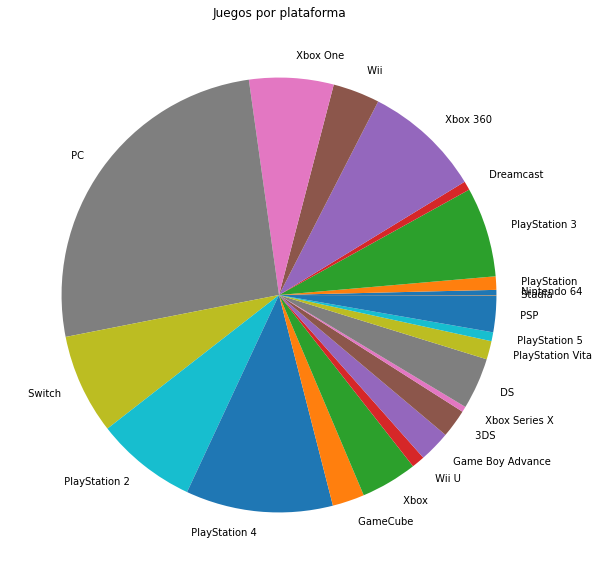

In [12]:
fig = plt.figure(figsize=(12, 10)) 
plt.pie(platform, labels=gm['platform'].unique()) 
plt.title('Juegos por plataforma') 
plt.show()

In [13]:
#el porcentaje de juegos por plataforma, número de observaciones=18800
for p, n in zip(platform,gm['platform'].unique()):
    x= (p/18800)*100
    print(n,x)

 Nintendo 64 0.3776595744680851
 PlayStation 0.9946808510638299
 PlayStation 3 6.680851063829787
 Dreamcast 0.6648936170212766
 Xbox 360 8.74468085106383
 Wii 3.4840425531914896
 Xbox One 6.2712765957446805
 PC 25.872340425531913
 Switch 7.441489361702128
 PlayStation 2 7.5212765957446805
 PlayStation 4 10.936170212765957
 GameCube 2.382978723404255
 Xbox 4.196808510638298
 Wii U 0.9787234042553191
 Game Boy Advance 2.3297872340425534
 3DS 2.106382978723404
 Xbox Series X 0.4095744680851064
 DS 3.829787234042553
 PlayStation Vita 1.3670212765957446
 PlayStation 5 0.6595744680851063
 PSP 2.723404255319149
 Stadia 0.026595744680851064


In [14]:
#variable conteniendo los 100 mejores juegos 
gm.nlargest(100,'meta_score')

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
95,Street Fighter IV,PlayStation 3,"February 17, 2009",Street Fighter IV features a mix of returning ...,94,7.4
96,Super Mario Advance 4: Super Mario Bros. 3,Game Boy Advance,"October 21, 2003","A combination of exciting platforming action, ...",94,8.9
97,Jet Grind Radio,Dreamcast,"October 30, 2000","Join a graffiti crew, stamp your territory and...",94,8.3
98,Metal Gear Solid,PlayStation,"October 21, 1998","You are Snake, a government agent on a mission...",94,9.2


In [15]:
top100= gm.nlargest(100,'meta_score')
top100['platform'].unique()

array([' Nintendo 64', ' PlayStation', ' PlayStation 3', ' Dreamcast',
       ' Xbox 360', ' Wii', ' Xbox One', ' PC', ' Switch',
       ' PlayStation 2', ' PlayStation 4', ' GameCube', ' Xbox', ' Wii U',
       ' Game Boy Advance', ' 3DS'], dtype=object)

In [16]:
top_plat= top100['platform'].unique()

In [17]:
tpls=[]
for i in top_plat:
    x= sum(top100['platform']==i)
    tpls.append(x)

In [18]:
#número de juegos por plataforma en el top 100
for i, e in zip(top_plat, tpls):
    print(i, e)

 Nintendo 64 4
 PlayStation 6
 PlayStation 3 14
 Dreamcast 4
 Xbox 360 13
 Wii 4
 Xbox One 4
 PC 16
 Switch 4
 PlayStation 2 12
 PlayStation 4 5
 GameCube 5
 Xbox 4
 Wii U 1
 Game Boy Advance 3
 3DS 1


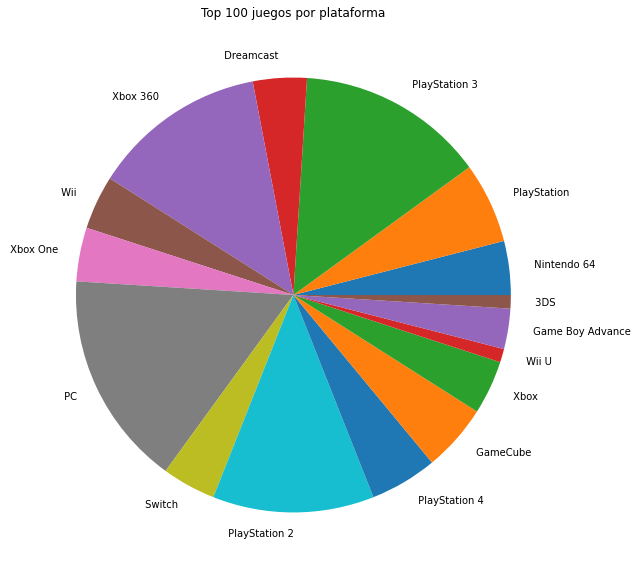

In [19]:
fig = plt.figure(figsize=(12, 10)) 
plt.pie(tpls, labels=top_plat) 
plt.title('Top 100 juegos por plataforma') 
plt.show()

In [20]:
#creación de variable conteniendo juegos antes del 2000
gm['gmdates']=pd.to_datetime(gm['release_date'])
print(gm['gmdates'])


0       1998-11-23
1       2000-09-20
2       2008-04-29
3       1999-09-08
4       2008-04-29
           ...    
18795   2013-05-21
18796   2003-11-03
18797   2015-09-22
18798   2012-10-15
18799   2009-03-31
Name: gmdates, Length: 18800, dtype: datetime64[ns]


In [21]:
gmbf_2000=gm[(gm['gmdates']<np.datetime64('2000-01-01'))]
print(gmbf_2000)

                                       name        platform  \
0      The Legend of Zelda: Ocarina of Time     Nintendo 64   
3                               SoulCalibur       Dreamcast   
28                            GoldenEye 007     Nintendo 64   
34                                 Tekken 3     PlayStation   
38                                Half-Life              PC   
...                                     ...             ...   
16162   Of Light and Darkness: The Prophecy              PC   
16506                      The X-Files Game   PlayStation 2   
16590                                Postal             Wii   
17130                             Harvester              PC   
18290        Jeremy McGrath Supercross 2000   PlayStation 4   

             release_date                                            summary  \
0       November 23, 1998  As a young boy, Link is tricked by Ganondorf, ...   
3       September 8, 1999  This is a tale of souls and swords, transcendi...   
28 

In [22]:
gmbf_2000[['name', 'platform', 'meta_score', 'user_review']].sort_values('meta_score',ascending=False).head(10)
#las plataformas con más juegos dentro del top 10 antes del 2000 son: PC, PlayStation y Nintendo 64

,name,platform,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,99,9.1
3,SoulCalibur,Dreamcast,98,8.4
28,GoldenEye 007,Nintendo 64,96,9.0
38,Half-Life,PC,96,9.1
41,Gran Turismo,PlayStation,96,8.6
34,Tekken 3,PlayStation,96,9.1
88,Sid Meier's Civilization II,PC,94,8.8
89,Quake,PC,94,8.8
98,Metal Gear Solid,PlayStation,94,9.2
99,Grim Fandango,PC,94,9.1


In [23]:
#Promedio de calificaciones de juegos por plataforma
gm.groupby('platform')['meta_score'].mean().sort_values(ascending = False)

platform
 Nintendo 64         78.436620
 Xbox Series X       75.987013
 PlayStation 5       75.427419
 Dreamcast           74.072000
 PlayStation         73.342246
 Switch              72.523231
 Wii U               72.423913
 Xbox One            72.395250
 PC                  71.797903
 PlayStation Vita    71.062257
 PlayStation 4       71.041342
 GameCube            70.953125
 PlayStation 3       70.710191
 Xbox                70.053232
 Stadia              69.800000
 3DS                 69.626263
 PlayStation 2       68.946959
 Xbox 360            68.867397
 Game Boy Advance    68.621005
 PSP                 68.542969
 DS                  66.679167
 Wii                 65.806107
Name: meta_score, dtype: float64

In [24]:
#Mejores juegos calificados en los últimos 3 años
gmls_3=gm[(gm['gmdates']>np.datetime64('2018-06-01'))]
gmls_3[['name', 'platform', 'meta_score', 'user_review']].sort_values('meta_score',ascending=False).head(20)

,name,platform,meta_score,user_review
7,Red Dead Redemption 2,Xbox One,97,8.0
16,Red Dead Redemption 2,PlayStation 4,97,8.5
22,The House in Fata Morgana - Dreams of the Reve...,Switch,97,8.2
10,Disco Elysium: The Final Cut,PC,97,8.3
59,Persona 5 Royal,PlayStation 4,95,8.4
61,Tetris Effect: Connected,Switch,95,8.5
143,Red Dead Redemption 2,PC,93,6.2
178,Resident Evil 2,Xbox One,93,8.7
172,Super Smash Bros. Ultimate,Switch,93,8.6
168,Hades,PC,93,8.9


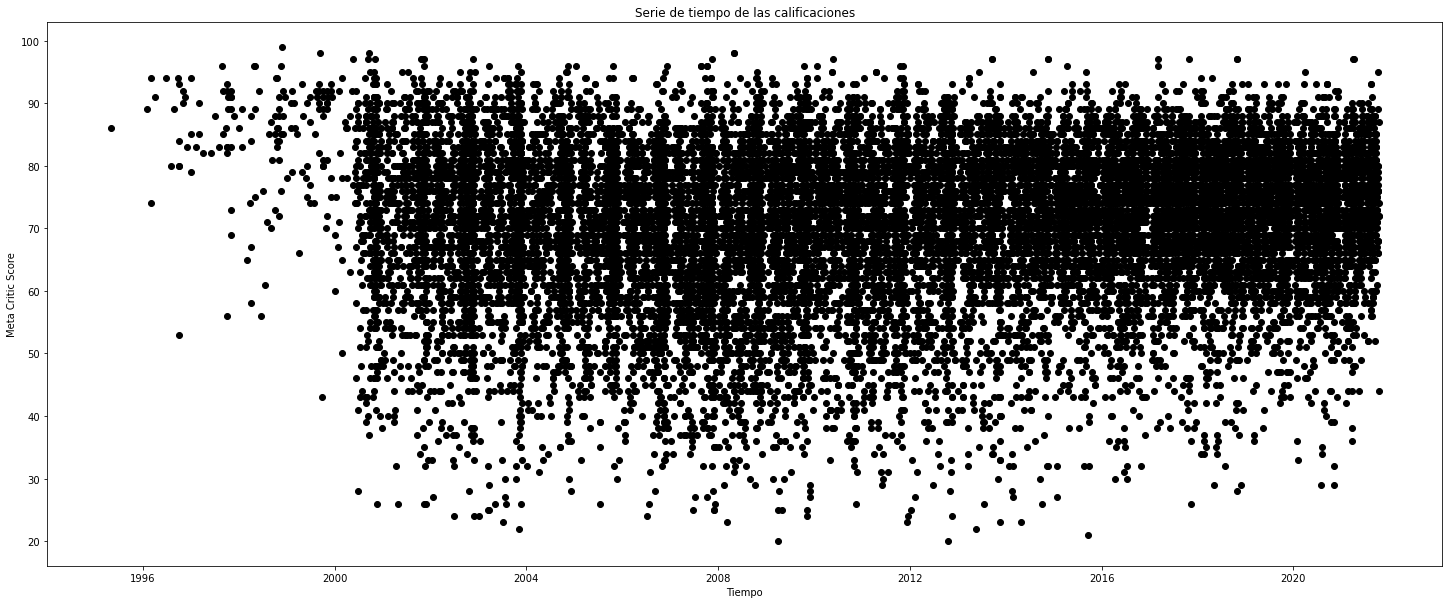

In [32]:
#el gráfico no muestra evidencia de una relación entre el tiempo 
x=gm['gmdates']
y=gm['meta_score']

plt.plot(x,y, color = 'black', marker = 'o',  linestyle = '')
plt.gcf().set_size_inches(25, 10)
plt.title('Serie de tiempo de las calificaciones') 
plt.ylabel('Meta Critic Score')
plt.xlabel('Tiempo')
plt.show()

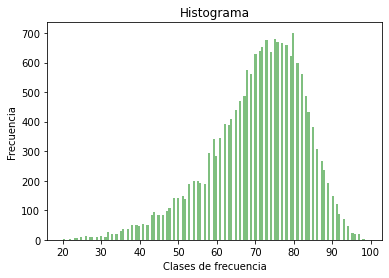

In [33]:
plt.hist(y, bins = 'sqrt', color = 'green', alpha = 0.5)
plt.title('Histograma')
plt.xlabel('Clases de frecuencia')
plt.ylabel('Frecuencia')
plt.show()